# Anuguru Parthiv Reddy
## 21CS10006

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay
from tensorflow.keras import models,layers
from sklearn.metrics import accuracy_score

data_dir_benign = '/home/parthiv/Documents/ML_for_Bio/Dataset/FNA/benign/'
data_dir_malignant='/home/parthiv/Documents/ML_for_Bio/Dataset/FNA/malignant/'
data_test='/home/parthiv/Documents/ML_for_Bio/Dataset/test/'

In [48]:
image_benign = os.listdir(data_dir_benign)
image_malignant = os.listdir(data_dir_malignant)
image_test = os.listdir(data_test)
print(len(image_benign))
print(len(image_malignant))

1075
651


### loading data as np array (to preprocess)
### preprocessing involved: making all images of same size and normalizing the pixels

In [49]:
dataset=[]
label=[]

for i , image_name in enumerate(image_benign):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(data_dir_benign+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((128,128))
        dataset.append(np.array(image))
        label.append(0)

for i ,image_name in enumerate(image_malignant):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(data_dir_malignant+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((128,128))
        dataset.append(np.array(image))
        label.append(1)

#convert list to numpy array
dataset=np.array(dataset)
label = np.array(label)

print(len(label),len(dataset))
print(label)
print(dataset)

1724 1724
[0 0 0 ... 1 1 1]
[[[[182 125 189]
   [179 119 182]
   [166 103 163]
   ...
   [246 242 246]
   [246 240 245]
   [246 240 245]]

  [[183 127 192]
   [181 122 186]
   [170 109 170]
   ...
   [246 242 246]
   [246 240 245]
   [246 240 245]]

  [[187 132 200]
   [185 130 197]
   [181 125 188]
   ...
   [245 241 246]
   [246 239 245]
   [246 238 245]]

  ...

  [[189 136 200]
   [189 136 202]
   [190 139 207]
   ...
   [240 233 242]
   [238 227 240]
   [237 226 239]]

  [[185 130 189]
   [185 132 192]
   [188 142 201]
   ...
   [245 242 246]
   [246 241 247]
   [246 241 247]]

  [[183 128 185]
   [184 131 189]
   [188 143 198]
   ...
   [247 245 248]
   [249 246 250]
   [249 246 250]]]


 [[[200 191 217]
   [203 193 219]
   [207 197 223]
   ...
   [244 242 244]
   [244 241 243]
   [244 241 243]]

  [[206 197 220]
   [208 199 222]
   [212 203 226]
   ...
   [244 242 244]
   [244 241 243]
   [244 241 243]]

  [[220 213 229]
   [222 215 230]
   [224 218 233]
   ...
   [244 242 243]


In [50]:
x_train,x_val,y_train,y_val=train_test_split(dataset,label,test_size=.2)
x_train=normalize(x_train,axis=1)
x_val=normalize(x_val,axis=1)

In [51]:
cnn=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(.5),
    layers.Dense(1,activation='sigmoid')
])
cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [52]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
44/44 [==============================] - 8s 174ms/step - loss: 0.6644 - accuracy: 0.6113
Epoch 2/5
44/44 [==============================] - 8s 173ms/step - loss: 0.6091 - accuracy: 0.6911
Epoch 3/5
44/44 [==============================] - 8s 175ms/step - loss: 0.5612 - accuracy: 0.7549
Epoch 4/5
44/44 [==============================] - 8s 174ms/step - loss: 0.4877 - accuracy: 0.8049
Epoch 5/5
44/44 [==============================] - 8s 173ms/step - loss: 0.4632 - accuracy: 0.8115


In [80]:
cnn.evaluate(x_val,y_val)

y_pred=cnn.predict(x_val)
y_pred = cnn.predict(x_val)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_pred, y_val)

print(f"Accuracy on validation data: {accuracy}")
print('classification Report\n',classification_report(y_val,y_pred))

11/11 [==============================] - 0s 42ms/step
Accuracy on validation data: 0.7246376811594203
classification Report
               precision    recall  f1-score   support

           0       0.70      0.99      0.82       216
           1       0.95      0.28      0.43       129

    accuracy                           0.72       345
   macro avg       0.82      0.63      0.62       345
weighted avg       0.79      0.72      0.67       345



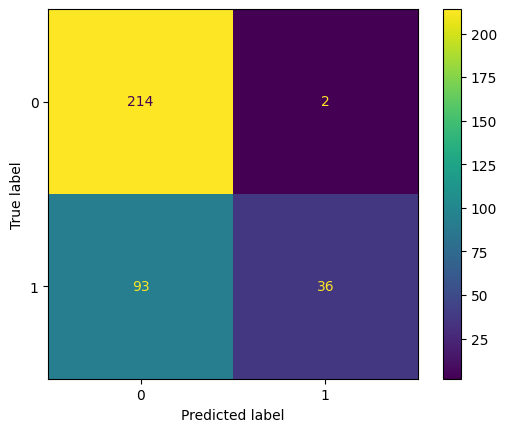

In [54]:
cm = confusion_matrix(y_val, y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

### note that images below are after transformaiton and normalization

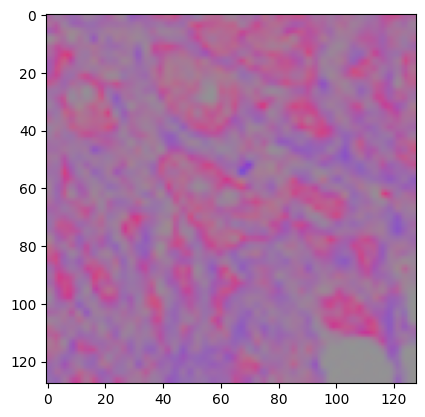

1/1 [==============================] - 0s 28ms/step
benign


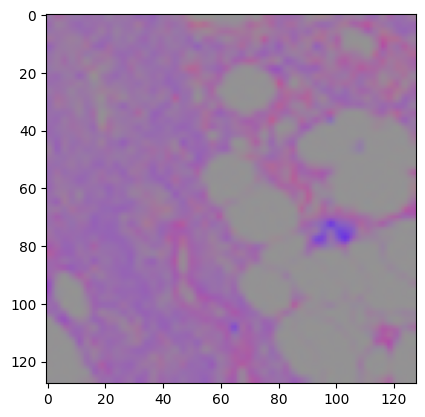

1/1 [==============================] - 0s 29ms/step
benign


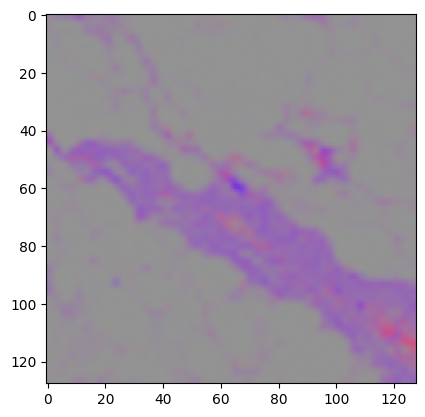

1/1 [==============================] - 0s 27ms/step
benign


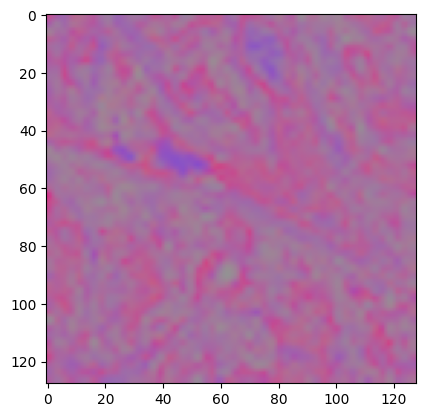

1/1 [==============================] - 0s 27ms/step
benign


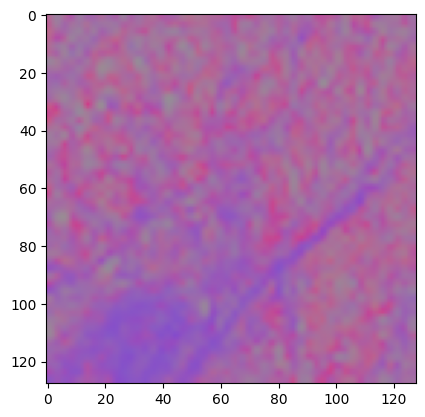

1/1 [==============================] - 0s 27ms/step
benign


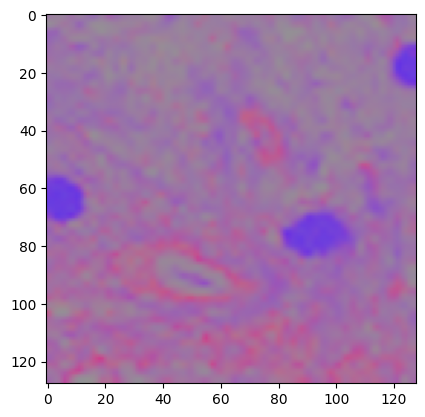

1/1 [==============================] - 0s 30ms/step
benign


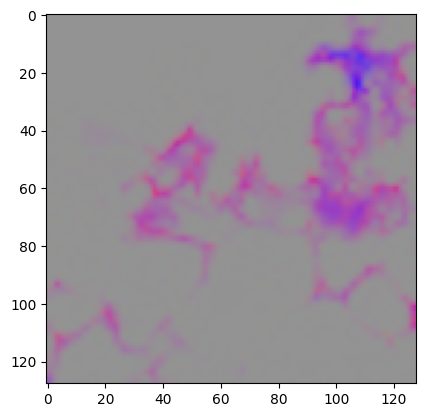

1/1 [==============================] - 0s 27ms/step
benign


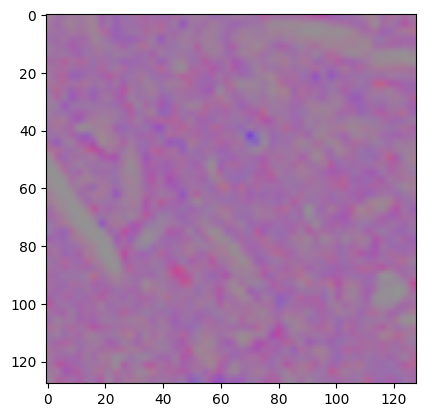

1/1 [==============================] - 0s 29ms/step
benign


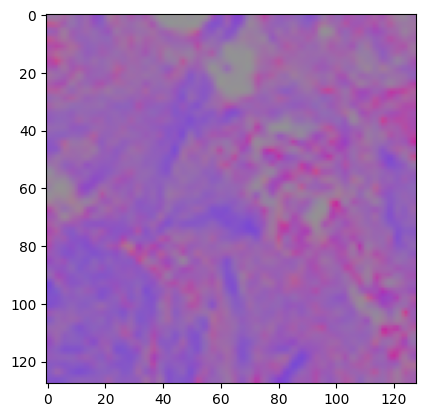

1/1 [==============================] - 0s 32ms/step
benign


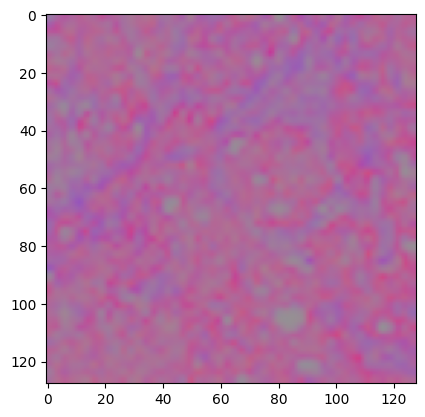

1/1 [==============================] - 0s 18ms/step
benign


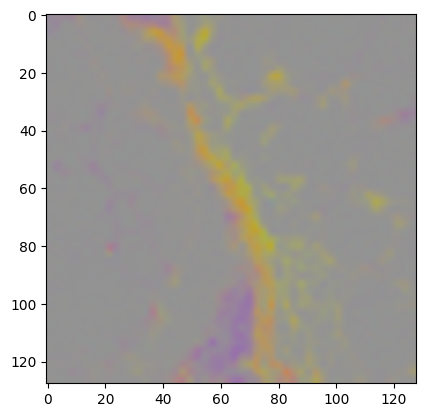

1/1 [==============================] - 0s 17ms/step
benign


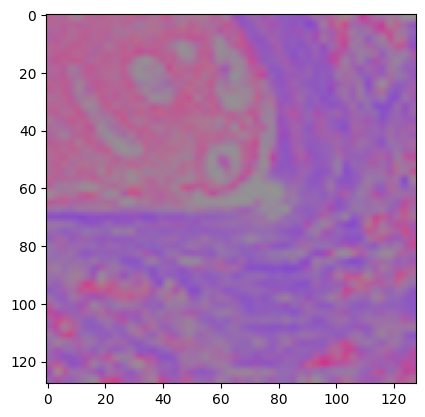

1/1 [==============================] - 0s 20ms/step
benign


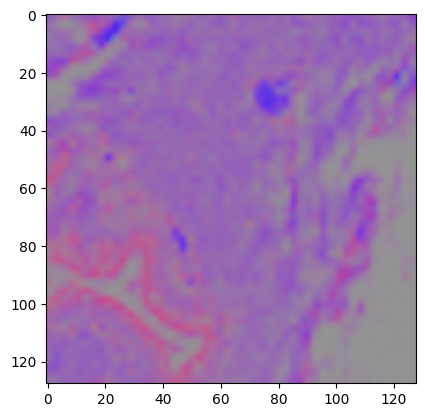

1/1 [==============================] - 0s 21ms/step
benign


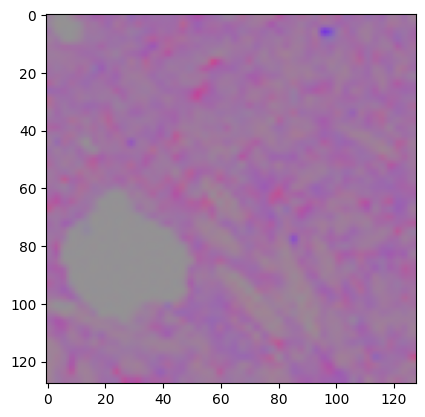

1/1 [==============================] - 0s 29ms/step
benign


In [78]:
def make_prediction(img,model):
    img = np.expand_dims(img, axis=0)
    plt.imshow(img[0])
    plt.show()
    res = model.predict(img)
    if (res>0.5):
        print("malignant")
    else:
        print("benign")

image_test=os.listdir(data_test)
test =[]
for i , image_name in enumerate(image_test):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(data_test+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((128,128))
        test.append(np.array(image))

test=np.array(test)
test=normalize(test)

for image in test:
    make_prediction(image,cnn)